<a href="https://colab.research.google.com/github/Topein/Producao_hospitalar_no_brasil/blob/main/Notebooks/Bootcamp_Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caderno de exploracao os dados do datasus 2008 pra frente

In [5]:
import pandas as pd


In [6]:
dados = pd.read_csv("/content/Ano_Mes Processamento.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";",skipfooter= 12, 
                    thousands= ".", decimal= ",")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 167 entries, Unidade da Federação to Total
dtypes: float64(164), object(3)
memory usage: 35.4+ KB


In [8]:
pd.options.display.float_format = "{:,.2f}".format

In [9]:
dados.head()


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63","3,068,430.44","2,825,838.52","2,931,173.58","2,885,269.07","2,860,103.74","3,684,944.68","3,607,289.68","3,774,356.60","3,706,711.84","3,763,187.55","3,533,625.83",3605007.43,"3,907,032.72","3,939,820.71","3,901,084.11","3,684,407.02","3,623,015.58","3,890,461.90","4,193,533.87","4,534,400.67","4,451,208.03","4,874,592.78","4,460,802.38","5,067,886.24","4,511,092.85","4,394,680.50","4,098,741.80","4,411,499.48","3,868,617.95","4,298,702.78",...,"8,525,499.78","9,177,611.46","7,368,996.38","8,835,095.43","8,328,186.64","8,408,512.77","9,351,705.82","8,143,007.97","8,949,741.77","9,630,553.15","9,581,970.31","7,891,114.05","9,792,370.67","9,170,787.53","8,816,846.71","10,024,554.15","9,675,423.70","8,085,025.66","9,222,010.60","7,493,901.30","8,148,169.46","7,353,768.37","7,739,864.47","9,308,601.23","11,954,489.94","11,887,993.85","10,328,280.19","8,068,024.57","9,486,450.48","9,018,235.63","9,858,841.18","9,806,315.07","14,946,369.28","15,552,930.66","16,269,008.71","15,380,532.08","14,228,814.25","12,427,865.05",10345616.78,"1,088,059,702.00"
1,12 Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53","1,923,886.57","1,756,986.80","2,235,639.98","2,497,116.43","2,253,558.01","2,122,673.92","2,834,317.62","2,722,065.97","2,432,831.95","2,630,190.65","2,307,579.00",-,"2,826,477.02","2,170,791.18","2,541,526.44","2,491,042.33","1,954,473.90","2,389,996.38","2,654,878.60","2,844,085.21","2,336,207.19","2,125,143.06","2,430,293.67","2,377,738.44","2,184,746.84","2,468,452.90","2,516,284.54","3,051,370.08","2,629,104.42","2,485,451.79",...,"3,126,429.88","2,998,865.51","2,619,709.86","3,018,048.94","3,342,614.24","2,123,426.26","2,664,654.52","1,906,429.95","3,096,439.63","2,411,628.00","2,840,630.58","3,260,153.59","3,250,722.84","3,204,998.88","3,052,745.65","3,124,802.29","3,021,521.75","2,874,871.28","3,331,803.55","3,417,691.07","3,076,003.20","2,286,642.60","2,896,340.24","3,045,245.80","3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","6,307,616.67","6,354,514.15","3,461,663.11","4,979,239.30","4,138,751.64",-,"475,290,315.30"
2,13 Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35","8,618,318.83","6,555,549.08","7,777,645.88","7,403,068.36","6,683,346.89","9,927,781.20","8,844,511.21","9,079,035.96","8,832,894.53","9,373,395.97","9,578,326.03",9730634.16,"9,179,252.65","8,314,648.93","9,050,439.39","9,419,460.86","8,680,178.57","9,168,055.41","9,897,901.80","9,651,362.37","10,854,599.47","10,417,122.89","8,718,347.13","8,221,592.12","9,613,977.03","9,927,574.41","9,470,661.21","9,736,750.91","8,745,259.80","9,380,112.36",...,"14,840,533.42","14,427,620.91","15,818,964.25","16,358,462.57","15,391,163.74","14,154,362.85","16,791,397.31","14,369,987.43","16,339,024.96","15,622,910.63","16,483,166.92","15,422,243.28","15,961,988.04","15,787,896.78","16,515,441.67","15,788,848.91","15,784,686.14","14,388,60

In [10]:
dados.mean()

2008/Jan      15,126,846.64
2008/Fev      22,710,158.12
2008/Mar      24,594,187.35
2008/Abr      25,431,957.83
2008/Mai      26,511,245.91
                 ...       
2021/Mai      79,540,074.51
2021/Jun      82,724,335.66
2021/Jul      81,601,322.73
2021/Ago      75,035,922.89
Total      6,852,328,259.74
Length: 164, dtype: float64

In [11]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
22,43 Rio Grande do Sul,"30,931,325.46","57,363,420.01","51,547,794.07","56,673,338.49","48,397,733.07","52,413,429.62","56,636,376.98","56,113,054.70","55,356,224.30","53,637,713.13","53,699,506.08","58,730,379.58","57,629,317.06","58,779,088.02","63,366,430.89","62,200,230.97","61,683,824.68","62,495,363.90","64,614,271.83","66,457,445.34",66425009.36,"65,782,428.73","63,714,541.87","64,488,493.88","66,304,168.50","61,527,419.52","62,490,522.38","66,814,413.40","67,900,518.35","64,799,726.75","68,518,232.07","68,731,297.03","66,174,969.16","66,891,309.48","67,456,434.73","67,096,302.52","60,754,144.32","58,884,339.85","66,205,364.40",...,"89,093,690.14","94,010,888.97","93,664,724.68","90,025,945.36","93,081,292.31","89,050,712.34","89,664,703.23","89,259,306.50","85,585,754.75","95,152,786.47","94,163,838.23","92,237,333.46","102,298,314.80","100,260,145.30","95,917,106.56","102,331,615.10","93,971,904.79","90,775,418.13","94,908,336.74","91,437,940.91","102,876,132.80","83,000,318.02","82,381,774.95","86,092,502.24","100,579,287.70","102,609,965.60","104,401,019.50","117,458,292.50","108,853,891.00","111,760,506.80","120,030,087.30","111,945,006.20","134,338,985.60","144,526,501.00","147,346,694.20","148,308,467.80","149,813,850.00","134,569,009.30",120016574.6,"13,613,341,350.00"
23,50 Mato Grosso do Sul,"5,377,392.11","7,002,472.61","8,423,933.19","8,797,487.68","9,770,421.80","10,905,392.18","10,249,299.82","9,671,553.45","10,218,511.05","9,547,923.55","9,450,010.19","8,365,709.79","10,033,643.71","10,746,263.10","10,849,523.03","10,902,848.13","11,991,649.26","12,050,259.66","12,174,950.98","11,178,470.01",11997775.92,"11,686,533.15","10,756,188.43","10,565,385.71","12,148,432.58","11,270,972.80","11,947,693.50","11,435,565.54","12,392,541.52","12,441,459.98","12,025,317.84","12,353,546.78","12,381,792.58","12,340,247.31","12,467,693.91","12,356,930.32","11,209,008.55","9,656,677.02","13,698,836.79",...,"17,090,876.79","16,468,255.95","17,395,858.50","16,259,261.13","16,390,075.24","15,350,893.92","17,108,719.02","17,713,810.57","16,882,690.96","18,253,870.27","17,778,458.45","18,387,822.48","19,870,933.20","18,913,862.69","19,591,383.84","18,935,437.09","17,230,688.81","17,895,244.76","18,115,134.64","19,542,439.88","19,032,785.73","17,410,262.53","17,913,161.92","17,363,192.43","18,858,844.44","19,877,080.68","19,247,894.51","19,497,210.85","22,023,126.25","19,782,832.55","22,014,085.88","25,249,961.65","26,028,833.50","26,840,420.75","28,649,201.59","33,920,480.87","31,552,023.11","36,310,521.96",32338424.49,"2,516,383,489.00"
24,51 Mato Grosso,"4,795,299.01","8,684,882.23","7,886,243.14","8,794,109.79","9,231,645.40","10,221,763.77","9,163,314.28","9,243,148.81","9,052,354.89","9,677,093.95","7,150,345.50","10,421,826.32","9,939,399.66","9,332,546.32","11,965,500.15","11,185,014.96","12,058,150.55","11,635,436.04","11,698,836.48","11,823,239.61",10810420.65,"12,130,636.06","11,574,096.75","10,726,251.53","12,364,760.67","11,382,133.07","11,947,040.32","12,233,217.84","12,656,421.09","11,263,407.74","12,795,267.96","12,805,173.87","12,171,713.91","11,961,452.83","11,777,799.00","11,142,684.27","11,709,080.86","11,149,107.81","12,381,255.67",...,"17,163,673.03","15,569,285.17","15,630,276.46","15,

In [12]:
dados = dados.replace("-",0)

In [13]:
dados["2021/Set"] = pd.to_numeric(dados["2021/Set"])

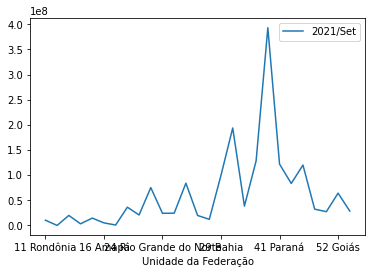

In [14]:
dados.plot(x="Unidade da Federação",y="2021/Set")

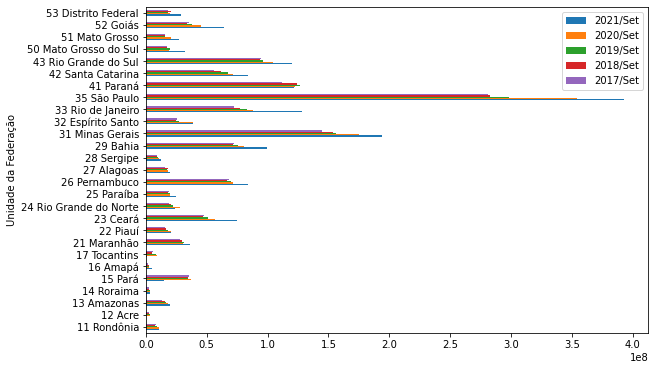

In [15]:
dados.plot(x="Unidade da Federação",y=["2021/Set","2020/Set","2019/Set","2018/Set","2017/Set"], kind ="barh", figsize=(9,6))

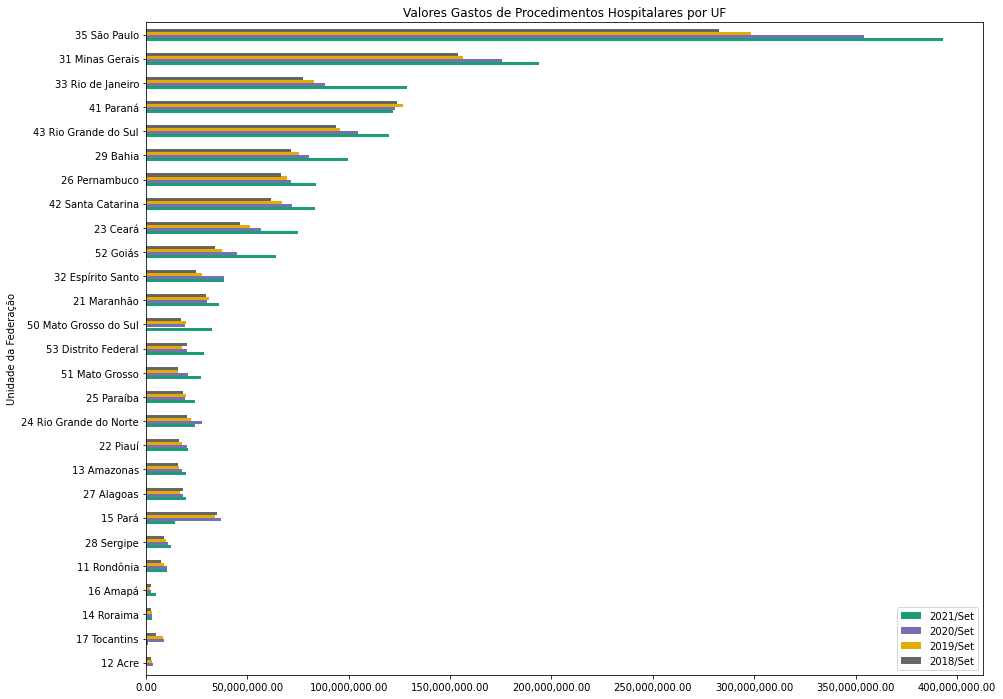

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.sort_values(by="2021/Set",ascending= True).plot(x="Unidade da Federação"
                    ,y=["2021/Set","2020/Set","2019/Set","2018/Set"], kind ="barh", figsize=(15,12), cmap = "Dark2")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valores Gastos de Procedimentos Hospitalares por UF")
plt.show()

In [17]:
dados[['2008/Abr','2008/Mai','2008/Jun']]

,2008/Abr,2008/Mai,2008/Jun
0,"1,525,314.96","1,645,953.84","1,406,150.68"
1,"1,730,469.42","1,819,443.92","1,828,496.00"
2,"8,259,378.42","7,831,399.90","8,477,273.62"
3,"839,994.39","862,347.96","832,440.66"
4,"20,842,829.69","23,249,952.88","23,240,687.56"
5,"1,141,137.32","866,346.18","1,440,978.95"
6,"4,984,482.09","5,511,002.46","4,927,934.22"
7,"14,809,416.46","14,505,727.38","14,908,091.32"
8,"10,775,976.33","10,398,360.88","10,528,253.88"
9,"30,676,457.06","30,604,453.47","31,272,395.18"


In [18]:

colunas_usaveis = dados.mean().index.to_list()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',


In [19]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63","3,068,430.44","2,825,838.52","2,931,173.58","2,885,269.07","2,860,103.74","3,684,944.68","3,607,289.68","3,774,356.60","3,706,711.84","3,763,187.55","3,533,625.83","3,907,032.72","3,939,820.71","3,901,084.11","3,684,407.02","3,623,015.58","3,890,461.90","4,193,533.87","4,534,400.67","4,451,208.03","4,874,592.78","4,460,802.38","5,067,886.24","4,511,092.85","4,394,680.50","4,098,741.80","4,411,499.48","3,868,617.95","4,298,702.78","5,062,171.26",...,"8,525,499.78","9,177,611.46","7,368,996.38","8,835,095.43","8,328,186.64","8,408,512.77","9,351,705.82","8,143,007.97","8,949,741.77","9,630,553.15","9,581,970.31","7,891,114.05","9,792,370.67","9,170,787.53","8,816,846.71","10,024,554.15","9,675,423.70","8,085,025.66","9,222,010.60","7,493,901.30","8,148,169.46","7,353,768.37","7,739,864.47","9,308,601.23","11,954,489.94","11,887,993.85","10,328,280.19","8,068,024.57","9,486,450.48","9,018,235.63","9,858,841.18","9,806,315.07","14,946,369.28","15,552,930.66","16,269,008.71","15,380,532.08","14,228,814.25","12,427,865.05","10,345,616.78","1,088,059,702.00"
1,12 Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53","1,923,886.57","1,756,986.80","2,235,639.98","2,497,116.43","2,253,558.01","2,122,673.92","2,834,317.62","2,722,065.97","2,432,831.95","2,630,190.65","2,307,579.00","2,826,477.02","2,170,791.18","2,541,526.44","2,491,042.33","1,954,473.90","2,389,996.38","2,654,878.60","2,844,085.21","2,336,207.19","2,125,143.06","2,430,293.67","2,377,738.44","2,184,746.84","2,468,452.90","2,516,284.54","3,051,370.08","2,629,104.42","2,485,451.79","2,685,361.47",...,"3,126,429.88","2,998,865.51","2,619,709.86","3,018,048.94","3,342,614.24","2,123,426.26","2,664,654.52","1,906,429.95","3,096,439.63","2,411,628.00","2,840,630.58","3,260,153.59","3,250,722.84","3,204,998.88","3,052,745.65","3,124,802.29","3,021,521.75","2,874,871.28","3,331,803.55","3,417,691.07","3,076,003.20","2,286,642.60","2,896,340.24","3,045,245.80","3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","6,307,616.67","6,354,514.15","3,461,663.11","4,979,239.30","4,138,751.64",0.00,"475,290,315.30"
2,13 Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35","8,618,318.83","6,555,549.08","7,777,645.88","7,403,068.36","6,683,346.89","9,927,781.20","8,844,511.21","9,079,035.96","8,832,894.53","9,373,395.97","9,578,326.03","9,179,252.65","8,314,648.93","9,050,439.39","9,419,460.86","8,680,178.57","9,168,055.41","9,897,901.80","9,651,362.37","10,854,599.47","10,417,122.89","8,718,347.13","8,221,592.12","9,613,977.03","9,927,574.41","9,470,661.21","9,736,750.91","8,745,259.80","9,380,112.36","10,179,342.29",...,"14,840,533.42","14,427,620.91","15,818,964.25","16,358,462.57","15,391,163.74","14,154,362.85","16,791,397.31","14,369,987.43","16,339,024.96","15,622,910.63","16,483,166.92","15,422,243.28","15,961,988.04","15,787,896.78","16,515,441.67","15,788,848.9

In [20]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63","3,068,430.44","2,825,838.52","2,931,173.58","2,885,269.07","2,860,103.74","3,684,944.68","3,607,289.68","3,774,356.60","3,706,711.84","3,763,187.55","3,533,625.83","3,907,032.72","3,939,820.71","3,901,084.11","3,684,407.02","3,623,015.58","3,890,461.90","4,193,533.87","4,534,400.67","4,451,208.03","4,874,592.78","4,460,802.38","5,067,886.24","4,511,092.85","4,394,680.50","4,098,741.80","4,411,499.48","3,868,617.95","4,298,702.78","5,062,171.26","4,769,347.86",...,"8,525,499.78","9,177,611.46","7,368,996.38","8,835,095.43","8,328,186.64","8,408,512.77","9,351,705.82","8,143,007.97","8,949,741.77","9,630,553.15","9,581,970.31","7,891,114.05","9,792,370.67","9,170,787.53","8,816,846.71","10,024,554.15","9,675,423.70","8,085,025.66","9,222,010.60","7,493,901.30","8,148,169.46","7,353,768.37","7,739,864.47","9,308,601.23","11,954,489.94","11,887,993.85","10,328,280.19","8,068,024.57","9,486,450.48","9,018,235.63","9,858,841.18","9,806,315.07","14,946,369.28","15,552,930.66","16,269,008.71","15,380,532.08","14,228,814.25","12,427,865.05","10,345,616.78","1,088,059,702.00"
12 Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53","1,923,886.57","1,756,986.80","2,235,639.98","2,497,116.43","2,253,558.01","2,122,673.92","2,834,317.62","2,722,065.97","2,432,831.95","2,630,190.65","2,307,579.00","2,826,477.02","2,170,791.18","2,541,526.44","2,491,042.33","1,954,473.90","2,389,996.38","2,654,878.60","2,844,085.21","2,336,207.19","2,125,143.06","2,430,293.67","2,377,738.44","2,184,746.84","2,468,452.90","2,516,284.54","3,051,370.08","2,629,104.42","2,485,451.79","2,685,361.47","2,723,636.56",...,"3,126,429.88","2,998,865.51","2,619,709.86","3,018,048.94","3,342,614.24","2,123,426.26","2,664,654.52","1,906,429.95","3,096,439.63","2,411,628.00","2,840,630.58","3,260,153.59","3,250,722.84","3,204,998.88","3,052,745.65","3,124,802.29","3,021,521.75","2,874,871.28","3,331,803.55","3,417,691.07","3,076,003.20","2,286,642.60","2,896,340.24","3,045,245.80","3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","6,307,616.67","6,354,514.15","3,461,663.11","4,979,239.30","4,138,751.64",0.00,"475,290,315.30"
13 Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35","8,618,318.83","6,555,549.08","7,777,645.88","7,403,068.36","6,683,346.89","9,927,781.20","8,844,511.21","9,079,035.96","8,832,894.53","9,373,395.97","9,578,326.03","9,179,252.65","8,314,648.93","9,050,439.39","9,419,460.86","8,680,178.57","9,168,055.41","9,897,901.80","9,651,362.37","10,854,599.47","10,417,122.89","8,718,347.13","8,221,592.12","9,613,977.03","9,927,574.41","9,470,661.21","9,736,750.91","8,745,259.80","9,380,112.36","10,179,342.29","11,061,892.22",...,"14,840,533.42","14,427,620.91","15,818,964.25","16,358,462.57","15,391,163.74","14,154,362.85","16,791,397.31","14,369,987

In [21]:
usaveis = usaveis.sort_values(by="Total", ascending=False)

In [22]:
usaveis = usaveis.drop("Total", axis=1)

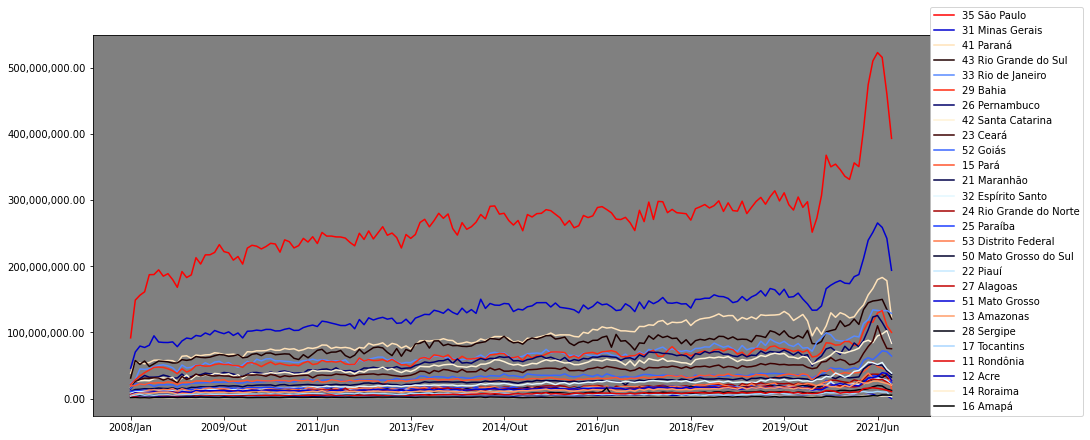

In [23]:
ax2 = usaveis.T.plot(figsize=(15,7), cmap='flag')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax2.set_facecolor("grey")
plt.legend(loc=(1,0))
plt.show() 


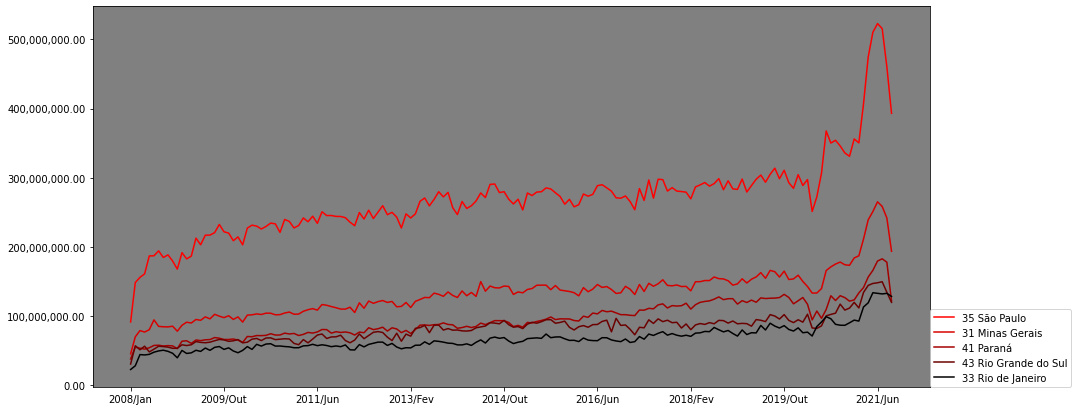

In [24]:
ax2 = usaveis.T.plot(y= [0,1,2,3,4],figsize=(15,7), cmap='flag')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax2.set_facecolor("grey")
plt.legend(loc=(1,0))
plt.show() 

In [25]:
usaveis.T.columns[:5]


Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro'],
      dtype='object', name='Unidade da Federação')

In [26]:
usaveis.sample(n=7)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
52 Goiás,"15,310,637.29","22,258,668.68","21,442,515.75","20,921,212.45","21,615,970.67","18,270,043.87","20,540,517.13","20,650,730.67","20,868,443.56","20,621,423.04","17,094,580.10","21,615,561.61","20,678,552.05","23,043,942.78","23,334,312.45","23,508,108.16","23,947,606.91","24,369,848.15","24,577,126.64","24,372,626.65","24,746,686.90","24,628,958.50","25,524,615.37","23,352,380.22","23,520,045.07","25,369,725.89","24,404,417.42","24,987,745.86","24,954,391.09","25,711,601.13","27,198,788.35","26,672,124.45","24,964,871.71","25,671,135.81","25,260,713.05","25,171,493.79","26,401,745.02","29,060,487.72","28,091,235.29","27,756,627.95",...,"35,536,937.30","35,009,953.87","33,899,286.36","33,936,535.21","34,482,719.13","33,695,646.06","36,347,762.27","35,162,665.51","33,658,226.73","36,733,253.84","36,260,374.54","38,159,986.89","37,236,918.46","37,769,227.09","37,979,735.24","37,470,767.39","37,337,272.34","35,734,855.79","34,879,373.70","35,794,874.64","35,048,141.29","34,843,938.16","30,932,236.73","34,406,945.17","36,101,619.85","40,617,188.84","46,248,805.85","44,920,822.38","45,564,156.75","43,097,417.03","44,305,389.14","46,473,895.94","44,329,462.46","57,701,390.23","61,623,242.59","58,737,766.85","64,789,459.87","72,021,155.22","70,902,865.44","64,176,809.02"
24 Rio Grande do Norte,"5,947,814.08","9,509,755.83","10,352,238.59","10,855,108.50","11,160,168.19","10,475,071.38","11,386,349.96","10,640,817.47","11,336,030.28","10,606,465.07","10,742,812.44","10,091,048.76","9,571,714.81","10,699,503.66","11,613,016.25","9,515,920.85","12,872,004.45","12,353,310.44","12,888,827.03","13,075,400.99","13,294,634.31","13,153,593.04","13,652,544.87","12,942,505.99","12,272,024.78","13,763,300.23","13,693,244.07","13,975,281.25","12,960,918.44","13,077,509.32","14,081,550.96","13,930,180.98","13,010,354.42","12,796,805.21","13,667,927.81","13,356,719.54","13,551,289.90","14,108,465.83","13,871,428.09","14,155,263.87",...,"20,137,699.72","21,652,391.73","21,629,797.35","20,189,873.01","21,332,372.73","20,581,258.13","17,227,874.04","22,503,704.70","20,181,547.44","23,086,510.42","21,820,682.35","23,588,813.89","21,530,220.97","22,229,779.85","23,120,838.46","22,455,827.10","22,263,163.66","22,922,628.16","20,949,027.15","23,101,224.38","21,644,473.35","22,438,442.72","18,744,943.81","19,454,054.00","21,476,468.96","26,337,808.77","27,579,658.62","27,721,340.38","26,052,671.89","24,742,027.80","23,886,822.89","28,074,416.33","26,581,525.53","28,444,100.38","35,930,307.69","36,764,212.60","36,708,007.18","35,989,101.68","32,369,373.29","24,063,936.32"
14 Roraima,"657,889.53","777,939.31","718,688.03","839,994.39","862,347.96","832,440.66","996,693.09","894,271.18","910,424.17","1,191,770.32","1,056,218.71","1,244,339.25","1,085,679.25","969,528.54","1,393,226.70","1,273,734.17","1,552,638.50","1,490,587.74","1,596,751.80","1,848,998.68","1,164,711.18","1,434,809.17","1,603,817.28","1,437,340.80","1,332,094.01","1,900,513.75","1,933,875.49","1,773,958.29","1,804,729.73","1,846,639.32","1,643,518.23","1,843,163.29","1,807,885.17","1,674,871.65","1,250,999.28","1,257,275.43","1,171,045.72","1,389,668.67","1,344,865.94","

In [27]:
usaveis["Total"] = usaveis.sum(axis=1)